# Time Series data generation

In [167]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Equation of a wave: y(x,t) = a * sin (ω*x + φ) 

a = amplitude of the wave (min max values)

ω = angular frequency (how many cycles occur in a second)

x = number of points

φ = phase of the signal (where do we start)

In [209]:
def timeseries(amplitude,frequency,phase,x):
    y = np.zeros(len(x))
    for i in range(len(amplitude)):
      y += np.sin(frequency[i]*x+phase[i])*amplitude[i]
    return y

def timeseriesPeak(timeseries,x):
    start = np.random.randint(len(x))
    end = start+100
    
    peak = np.sin(0.001*x)*300
    peak += np.random.rand(1000)
    
    peak[x<start]=0
    peak[x>end]=0
    
    return timeseries+peak, peak


def timeseriesDec(amplitude,frequency,phase,x,slope):
    y = np.zeros(len(x))
    for i in range(len(amplitude)):
      y += np.sin(frequency[i]*x-phase[i])*amplitude[i]-slope[i]*x
    return y

def timeseriesPeakDec(timeseriesDec,x):
    start = np.random.randint(len(x))
    end = start+80
    
    peakDec = np.sin(0.01*x)*200+500*x
    peakDec += np.random.rand(1000)
    
    peakDec[x<start]=0
    peakDec[x>end]=0
    
    return timeseriesDec+peakDec, peakDec

def updwntimeseries(amplitude,frequency,phase,x):
    y = np.zeros(len(x))
    for i in range(len(amplitude)):
      if i < 80:
        y += np.sin(frequency[i]*x+phase[i])*amplitude[i]
      else:
        y -= np.sin(frequency[i]*x+phase[i])*amplitude[i]
    return y

def updwntimeseriesPeak(timeseriesPeakDec,x):
    start = np.random.randint(len(x))
    end = start+80
    
    peak = np.sin(0.001*x)*60
    
    peak[x<start]=0
    peak[x>end]=0
    
    return timeseriesPeakDec+peak, peak

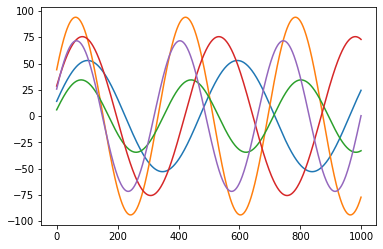

In [182]:
# vectors for w phase and amplitude regular shape
# these arrrays contain 200 random values between (0,1) and we multiply the w by 0.02 to
# ensure cycles in the time series 
p1 = np.random.rand(200)
a1 = np.random.rand(200)
w1 = np.ones(200)*0.02

x = np.arange(start=0, stop=(1000))

# We will create 200 time series, we will multiply the w phase and amplitude
# to obtain different results
yValues = []
for i in range(1,200):
    rand_w = np.random.uniform(0.3,1)
    rand = np.random.uniform(0,1)
    y=timeseries(a1*rand,w1*rand_w,p1*rand,x)
    yValues.append(y)
    if i <= 5:
        plt.plot(x,y)

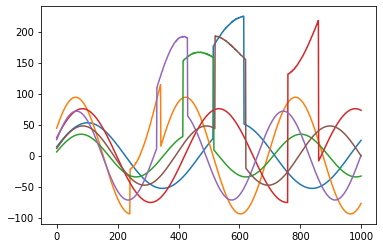

In [183]:
# We will create 200 time series with spikes
ySpikes = []
for i in range(0,len(yValues)):
    y, peak = timeseriesPeak(yValues[i],x)
    ySpikes.append((y,peak))
    if i <= 5:
        plt.plot(x,y)

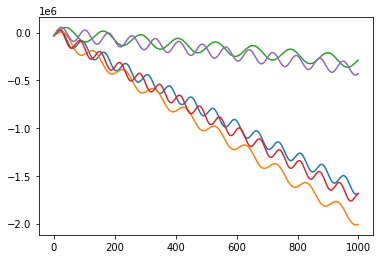

In [184]:
p2 = np.random.rand(200)
a2 = np.random.randint(100,600,200)
w2 = np.ones(200)
b = np.ones(200)

x = np.arange(start=0, stop=(1000))

yValuesDec = []
for i in range(1,200):
    rand_w = np.random.uniform(0.02,0.1)
    rand = np.random.uniform(1,10)
    y = timeseriesDec(a2,w2*rand_w,p2,x,b*rand)
    yValuesDec.append(y)
    if i <= 5:
        plt.plot(x,y)


#z = np.sin(x*0.02-150)*400-4*x

#plt.plot(x,z)


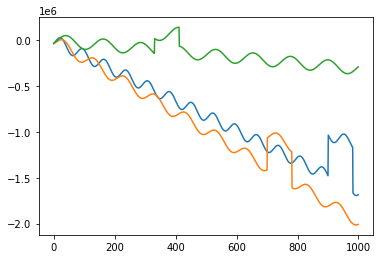

In [185]:
# We will create 200 time series with spikes
ySpikesDec = []
for i in range(0,len(yValuesDec)):
    y, peakDec = timeseriesPeakDec(yValuesDec[i],x)
    ySpikesDec.append((y,peakDec))
    if i <= 2:
        plt.plot(x,y)

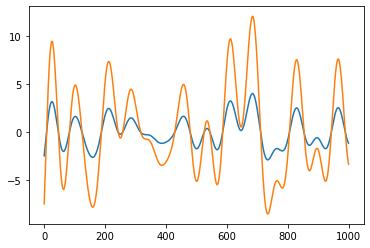

In [210]:
w3 = np.random.rand(200)*0.1#+0.1
p3 = np.random.rand(200)
a3 = np.random.rand(200)*0.1#+0.1

x = np.arange(start=0, stop=1000)

yValuesupdwn = []
for i in range(1,200):
  randa = np.random.uniform(1,10)
  randp = np.random.uniform(1,20)
  y = updwntimeseries(a3*randa,w3,p3+randp,x)
  yValuesupdwn.append(y)
  if i <= 2:
      plt.plot(x,y)


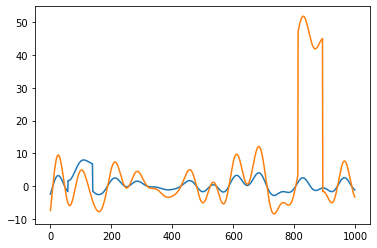

In [211]:
ySpikesupdwn = []
for i in range(0,len(yValuesupdwn)):
    y, peakupdwn = updwntimeseriesPeak(yValuesupdwn[i],x)
    ySpikesupdwn.append((y,peakupdwn))
    if i <= 1:
        plt.plot(x,y)

In [53]:
def timeseries2Df(ts,peak):
  peak[peak > 0] = 1
  d = { 'value': ts , 'anomaly':peak}
  return pd.DataFrame(data=d)


In [54]:
df = timeseries2Df(ySpikes[1][0],ySpikes[1][1])
df

,value,anomaly
0,5.401129,0.0
1,5.696232,0.0
2,5.990879,0.0
3,6.285046,0.0
4,6.578708,0.0
...,...,...
995,11.560271,0.0
996,11.279026,0.0
997,10.996877,0.0
998,10.713845,0.0


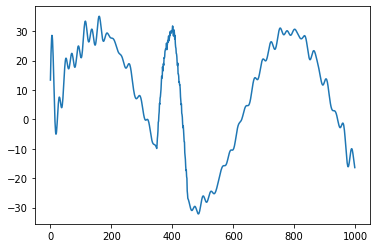

In [66]:
randcomp = 200

w_rand_ampl=0.2
w_rand_offs=0.1

w = np.random.rand(200)*0.2+0.1
p = np.random.rand(200)
a = np.random.rand(200)*0.1+0.1

x = np.arange(start=0, stop=1000)

y = np.zeros(1000)
for i in range(200):
  y += np.sin(w[i]*x+p[i])*a[i]

peak = -0.02*(x-400)**2+50
peak += np.random.rand(1000)*3
peak[x<350]=0
peak[x>450]=0
#plt.plot(x,peak)
plt.plot(x,y+peak+np.sin(0.01*x)*30)



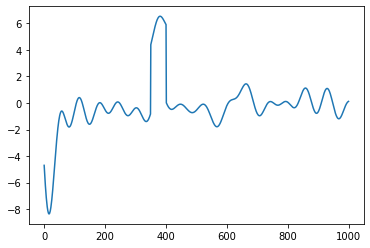

In [154]:
w = np.random.rand(200)*0.1#+0.1
p = np.random.rand(200)
a = np.random.rand(200)*0.1#+0.1

x = np.arange(start=0, stop=1000)

y = np.zeros(1000)
for i in range(200):
  y -= np.sin(w[i]*x+p[i])*a[i]
  

#peak = 0.01*(x-100)
peak = np.sin(0.001*x)*15
peak[x<350]=0
peak[x>400]=0
plt.plot(x,y+peak)

714
814


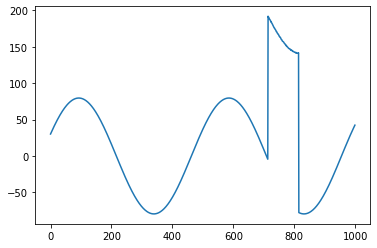

In [ ]:
start = np.random.randint(900)
end = start+100
print(start)
print(end)

peak = np.sin(0.001*x)*300
peak += np.random.rand(1000)
peak[x<start]=0
peak[x>end]=0
plt.plot(x,yValues[25]+peak)
#plt.plot(x,peak)

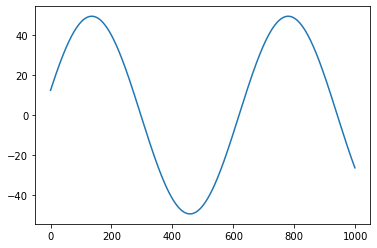

In [ ]:
plt.plot(x,yValues[25])